In [ ]:
import pandas as pd
import numpy as np
import os
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plot
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#import texthero
#import texthero as hero
#regular expressions
import re
#display pandas dataframe columns
pd.options.display.max_columns = None


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweet = pd.read_csv('/content/gdrive/MyDrive/copy_hate_speech_labeled_data.csv',delimiter=',',engine='python',encoding='utf-8-sig')
tweet.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
nRowsRead = None # specify 'None' if want to read whole file
# labeled_data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df0 = pd.read_csv('../content/gdrive/MyDrive/copy_hate_speech_labeled_data.csv', delimiter=',', nrows = nRowsRead)
df0.dataframeName = 'copy_hate_speech_labeled_data.csv'
nRow, nCol = df0.shape
print('There are {} rows and {} columns'.format(nRow, nCol))

There are 24783 rows and 7 columns


#**Data Pre-Processing:** Text Cleaning

In [ ]:
# change the column names as well as combine the categories into one column
c=tweet['class']
tweet.rename(columns={'tweet' : 'text',
                   'class' : 'category'},
                    inplace=True)
a=tweet['text']
b=tweet['category'].map({0: 'hate_speech', 1: 'offensive_language',2: 'neither'})

df= pd.concat([a,b,c], axis=1)
df.rename(columns={'class' : 'label'},
                    inplace=True)
df

,text,category,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language,1
...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language,1
24779,"you've gone and broke the wrong heart baby, an...",neither,2
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language,1
24781,youu got wild bitches tellin you lies,offensive_language,1


In [ ]:
# Handle Diacritics with text normalization
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [ ]:
df['text'] = df['text'].apply(simplify)

In [ ]:
# Remove user handles
df['text'].replace(r'@\w+','',regex=True,inplace=True)

In [ ]:
# Remove the urls
df['text'].replace(r'http\S+','',regex=True,inplace=True)

In [ ]:
# Tokenize
tokenizer = TweetTokenizer(preserve_case=True)
df['text'] = df['text'].apply(tokenizer.tokenize)

In [ ]:
df.head(5)

,text,category,label
0,"[!, !, !, RT, :, As, a, woman, you, shouldn't,...",neither,2
1,"[!, !, !, RT, :, boy, dats, cold, ..., tyga, d...",offensive_language,1
2,"[!, !, !, RT, Dawg, !, !, !, RT, :, You, ever,...",offensive_language,1
3,"[!, !, !, RT, :, she, look, like, a, tranny]",offensive_language,1
4,"[!, !, !, RT, :, The, shit, you, hear, about, ...",offensive_language,1


In [ ]:
import nltk
>>> nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
# Remove Stopwords
stop_words = stopwords.words('english')

#add additional stop words to be removed from the text
additional_list = ['amp','rt','u',"can't",'ur']

for words in additional_list:
    stop_words.append(words)

In [ ]:
stop_words[-10:]

["weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'amp',
 'rt',
 'u',
 "can't",
 'ur']

In [ ]:
#remove stop words
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stop_words]
    return clean_text

In [ ]:
#remove  stop words from tweets
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
df['text'].head()

0    [!, !, !, RT, :, As, woman, complain, cleaning...
1    [!, !, !, RT, :, boy, dats, cold, ..., tyga, d...
2    [!, !, !, RT, Dawg, !, !, !, RT, :, You, ever,...
3                 [!, !, !, RT, :, look, like, tranny]
4    [!, !, !, RT, :, The, shit, hear, might, true,...
Name: text, dtype: object

In [ ]:
# Spelling corrections
from textblob import TextBlob

def spell_check(text):
    '''Function to do spelling correction using '''
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return corrected_text

In [ ]:
# remove hashtags
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)

In [ ]:
df['text'] = df['text'].apply(remove_hashsymbols)

In [ ]:
df.head(5)

,text,category,label
0,"[!, !, !, RT, :, As, woman, complain, cleaning...",neither,2
1,"[!, !, !, RT, :, boy, dats, cold, ..., tyga, d...",offensive_language,1
2,"[!, !, !, RT, Dawg, !, !, !, RT, :, You, ever,...",offensive_language,1
3,"[!, !, !, RT, :, look, like, tranny]",offensive_language,1
4,"[!, !, !, RT, :, The, shit, hear, might, true,...",offensive_language,1


In [ ]:
# Remove single and double length characters
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def rem_shortwords(text):
    '''Function to remove the short words of length 1 and 2 characters'''
    '''Arguments:
       text: string
       returns: string without containing words of length 1 and 2'''
    lengths = [1, 2]
    if not isinstance(text, str):
        text = str(text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if len(word) not in lengths]
    new_text = ' '.join(filtered_tokens)
    return new_text

In [ ]:
df['text'] = df['text'].apply(rem_shortwords)

In [ ]:
df.head(5)

,text,category,label
0,'RT 'As 'woman 'complain 'cleaning 'house 'man...,neither,2
1,'RT 'boy 'dats 'cold ... 'tyga 'dwn 'bad 'cuff...,offensive_language,1
2,'RT 'Dawg 'RT 'You 'ever 'fuck 'bitch 'start '...,offensive_language,1
3,'RT 'look 'like 'tranny,offensive_language,1
4,'RT 'The 'shit 'hear 'might 'true 'might 'fake...,offensive_language,1


In [ ]:
df['text'] = df['text'].apply(tokenizer.tokenize)

In [ ]:
df.head(5)

,text,category,label
0,"[', RT, ', As, ', woman, ', complain, ', clean...",neither,2
1,"[', RT, ', boy, ', dats, ', cold, ..., ', tyga...",offensive_language,1
2,"[', RT, ', Dawg, ', RT, ', You, ', ever, ', fu...",offensive_language,1
3,"[', RT, ', look, ', like, ', tranny]",offensive_language,1
4,"[', RT, ', The, ', shit, ', hear, ', might, ',...",offensive_language,1


In [ ]:
# Remove digits
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)

In [ ]:
df['text'] = df['text'].apply(rem_digits)
df['text'] = df['text'].apply(tokenizer.tokenize)
df.head()

,text,category,label
0,"[', RT, ', As, ', woman, ', complain, ', clean...",neither,2
1,"[', RT, ', boy, ', dats, ', cold, ..., ', tyga...",offensive_language,1
2,"[', RT, ', Dawg, ', RT, ', You, ', ever, ', fu...",offensive_language,1
3,"[', RT, ', look, ', like, ', tranny]",offensive_language,1
4,"[', RT, ', The, ', shit, ', hear, ', might, ',...",offensive_language,1


In [ ]:
# Remove special characters
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [ ]:
# remove the non alpha numeric characters from the tweet tokens
df['text'] = df['text'].apply(rem_nonalpha)

# **Explanatory Data Analysis (EDA)**

In [ ]:
df1 = df.copy()

In [ ]:
df1

,text,category,label
0,"[RT, As, woman, complain, cleaning, house, man...",neither,2
1,"[RT, boy, dats, cold, tyga, dwn, bad, cuffin, ...",offensive_language,1
2,"[RT, Dawg, RT, You, ever, fuck, bitch, start, ...",offensive_language,1
3,"[RT, look, like, tranny]",offensive_language,1
4,"[RT, The, shit, hear, might, true, might, fake...",offensive_language,1
...,...,...,...
24778,"[you, muthaf, lie, right, His, TL, trash, Now,...",offensive_language,1
24779,"[gone, broke, wrong, heart, baby, drove, redne...",neither,2
24780,"[young, buck, wan, eat, dat, nigguh, like, ain...",offensive_language,1
24781,"[youu, got, wild, bitches, tellin, lies]",offensive_language,1


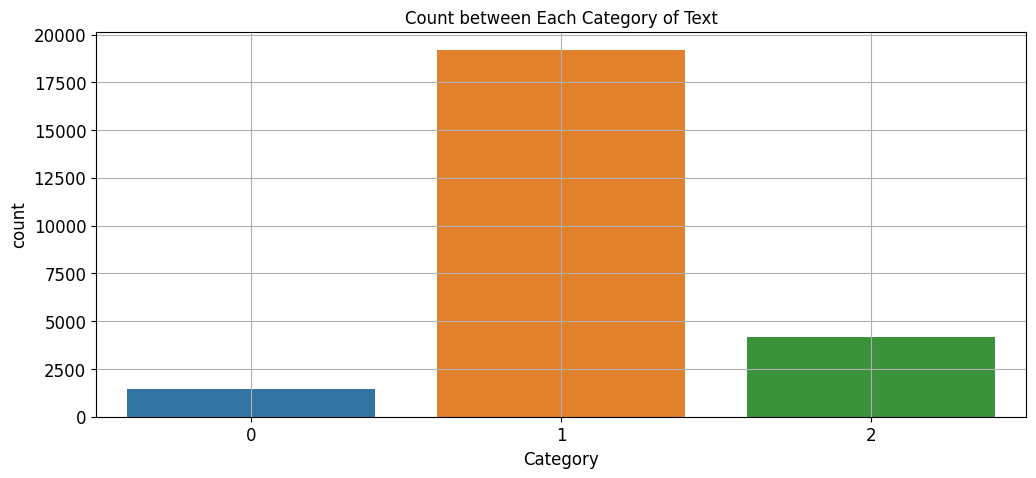

In [ ]:
# 0: 'hate_speech'
# 1: 'offensive_language'
# 2: 'neither'
sns.countplot(df1, x="label")
plt.xlabel("Category")
plt.title('Count between Each Category of Text')
plt.grid()
plt.show()

# theres a significantly a lot more offensive languages than hate speach.

In [ ]:
# Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer
# bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1, 1), analyzer="word", stop_words='english')
df['text'] = df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df = df[df['text'].str.strip() != '']
#df_bow = bow.fit_transform(df['text'])
df_bow = bow.fit_transform(df['text'])
df_bow

<24777x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 113862 stored elements in Compressed Sparse Row format>

In [ ]:
from collections import Counter
all_words = []
for msg in df['text'].values:
    words = str(msg).lower().strip().split(' ')
    all_words.extend(words)

count = Counter(all_words)
count.most_common(10)

[('bitch', 8331),
 ('rt', 7619),
 ('bitches', 3115),
 ('like', 2782),
 ('hoes', 2393),
 ('pussy', 2152),
 ('hoe', 1939),
 ('got', 1602),
 ('ass', 1577),
 ('get', 1436)]

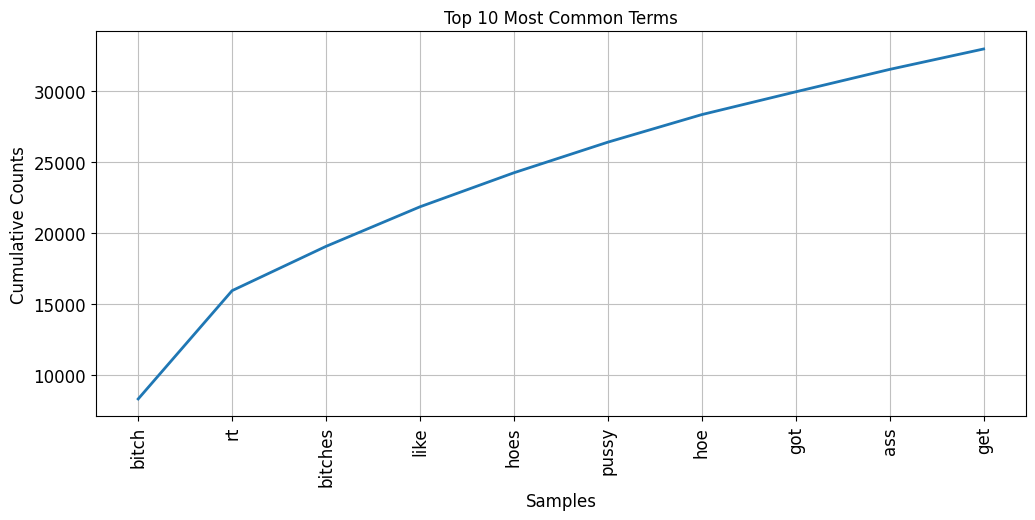

In [ ]:
# plot the cumulative frequency of the top 10 most common tokens
frequency = nltk.FreqDist(count)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

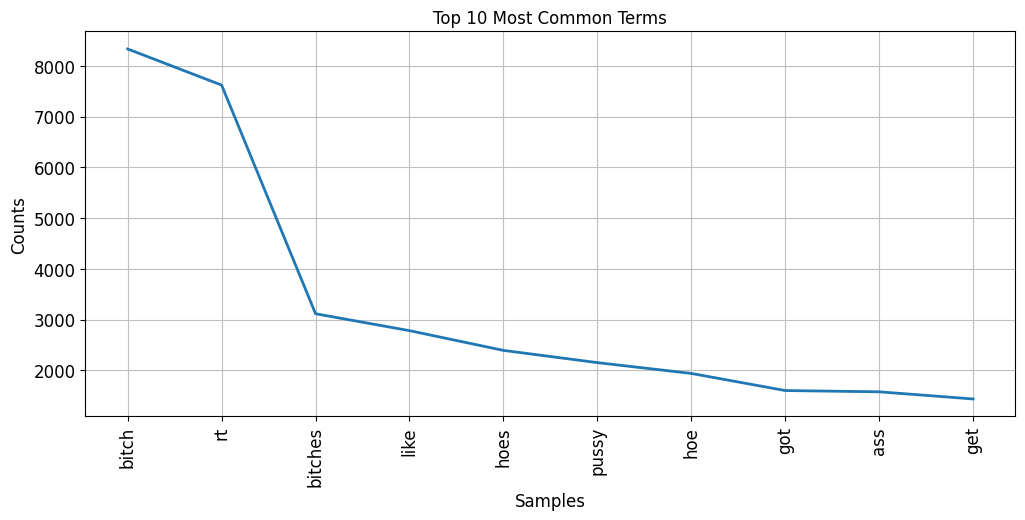

In [ ]:
# plot the frequency of the top 10 most common tokens
frequency = nltk.FreqDist(count)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

# **ML Classification Models:**
## Logistic Regression, Bernoilli, Naives Bayes, Neural Networks

In [ ]:
#join the tokens back to form the string
df1['text'] = df1['text'].apply(lambda x: ' '.join(x))

In [ ]:
df.head(5)

,text,category,label
0,RT As woman complain cleaning house man always...,neither,2
1,RT boy dats cold tyga dwn bad cuffin dat hoe s...,offensive_language,1
2,RT Dawg RT You ever fuck bitch start cry You c...,offensive_language,1
3,RT look like tranny,offensive_language,1
4,RT The shit hear might true might faker bitch ...,offensive_language,1


## Train-Test Split:

In [ ]:
#split the data into input X and output y
X = df1['text']
y = df1['label']

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.2 #20% of the data in the
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df1['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19826,) (4957,) (19826,) (4957,)


In [ ]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
#instantiate the vectorizer
vectorizer = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b')

In [ ]:
#fit on the training data
#X_train_vec = vectorizer.fit_transform(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
#transform the test data
#X_test_vec = vectorizer.transform(X_test)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
#check the shape
X_train.shape, X_test.shape

((19826,), (4957,))

## Ordinary Logistic Regression

In [ ]:
#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#instantiate the models with default hyper-parameters
clf = LogisticRegression()
clf.fit(X_train_vec,y_train)
train_predictions = clf.predict(X_train_vec)
test_predictions = clf.predict(X_test_vec)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# model evaluation of logistic regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,test_predictions))

Accuracy Score on training set 0.93781
Accuracy Score on test set 0.90155


In [ ]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.84      0.29      0.43      1144
           1       0.94      0.99      0.96     15352
           2       0.92      0.94      0.93      3330

    accuracy                           0.94     19826
   macro avg       0.90      0.74      0.78     19826
weighted avg       0.93      0.94      0.93     19826



In [ ]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.58      0.16      0.25       286
           1       0.91      0.97      0.94      3838
           2       0.87      0.85      0.86       833

    accuracy                           0.90      4957
   macro avg       0.79      0.66      0.68      4957
weighted avg       0.89      0.90      0.89      4957




Confusion Matrix - Test Set:
[[  45  219   22]
 [  33 3718   87]
 [   0  127  706]]


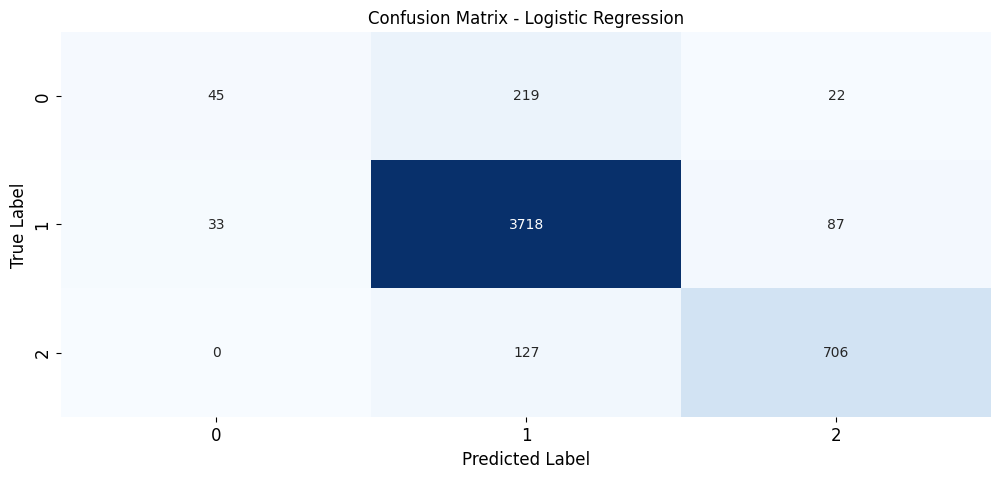

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Hyperparameter Pruning and Regularization

In [ ]:
#import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [ ]:
#check the search space
print(space)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78b9c946ac20>}


In [ ]:
# evaluation metrics
# credits/source:
"""
https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
"""
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

## Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train_vec, y_train)

BernoulliNB(alpha=2)

In [ ]:
# Predictions on the training and test sets
train_predictions = BNBmodel.predict(X_train_vec)
test_predictions = BNBmodel.predict(X_test_vec)

In [ ]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, test_predictions))


Training Accuracy: 0.8327
Test Accuracy: 0.8053

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       286
           1       0.80      1.00      0.89      3838
           2       0.92      0.19      0.32       833

    accuracy                           0.81      4957
   macro avg       0.57      0.40      0.40      4957
weighted avg       0.77      0.81      0.74      4957



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Confusion Matrix - Test Set:
[[   0  280    6]
 [   0 3830    8]
 [   0  671  162]]


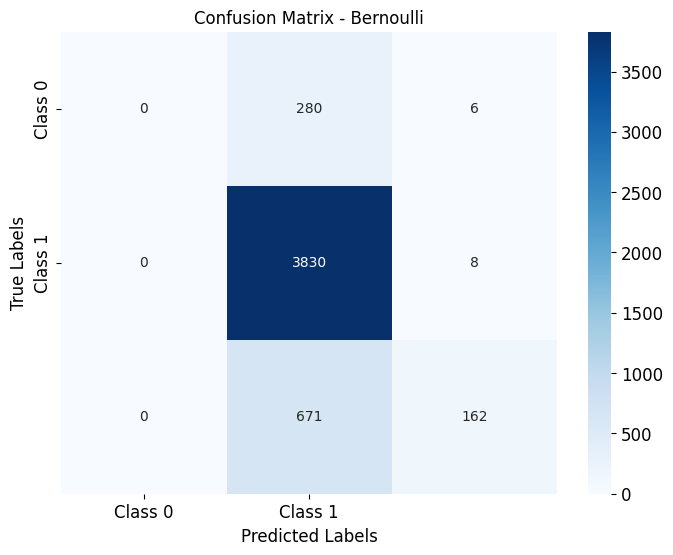

In [ ]:
# Create confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Bernoulli")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
pip install np_utils

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from tensorflow.keras import utils
utils.to_categorical
from joblib import dump, load

## Naive Bayes

In [ ]:
from sklearn.exceptions import NotFittedError
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import pandas as pd

class CountVectorSentimentModel:

    def __init__(self, classifier=MultinomialNB()):
        self.vect = CountVectorizer()
        self.classifier = classifier
        self.is_fitted = False  # New attribute to track whether the model is fitted

    def fit(self, X_train, y_train):
        if not isinstance(X_train, (list, pd.Series)):
            raise ValueError("Unsupported type for X_train. Use a list of strings, a Pandas Series, or a sparse matrix.")

        if len(X_train) != len(y_train):
            raise ValueError("Number of samples in X_train and y_train must be consistent.")

        # Fit both the vectorizer and the classifier
        self.train_count_vectors = self.vect.fit_transform(X_train)
        self.classifier.fit(self.train_count_vectors, y_train)

        self.is_fitted = True

    def vectorize(self, X):
        if not self.is_fitted:
            raise NotFittedError("Model is not fitted. Call fit() before vectorizing.")

        if isinstance(X, list):
            return self.vect.transform(X)
        elif isinstance(X, csr_matrix):
            return X
        elif isinstance(X, pd.Series):
            return self.vect.transform(X.values)
        else:
            raise ValueError("Unsupported type for X. Use a list of strings, a Pandas Series, or a sparse matrix.")

    def predict(self, X):
        X_vect = self.vectorize(X)
        return self.classifier.predict(X_vect)




In [ ]:
# Assuming X_train_list is a list of strings
#X_train_list = ["hate speech", "offensive language", "neither"]
#y_train_list = [0, 1, 2]
cvsm = CountVectorSentimentModel()
cvsm.fit(X_train, y_train)


In [ ]:
# Save the vocabulary for later use
vocabulary = cvsm.vect.vocabulary_

# Reinitialize CountVectorizer with the saved vocabulary
cvsm.vect = CountVectorizer(vocabulary=vocabulary)

X_test_vect = cvsm.vectorize(X_test)
y_pred_cvsm = cvsm.predict(X_test)

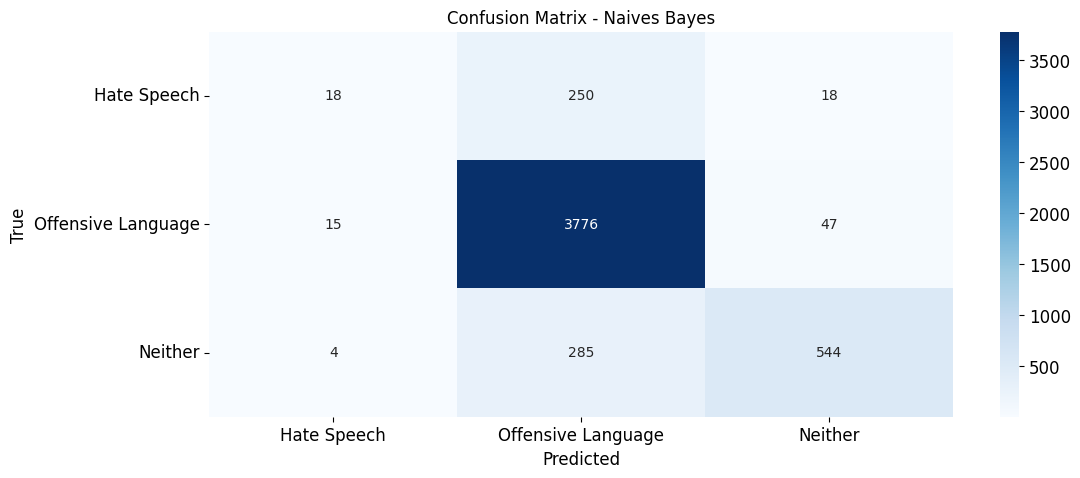

                    precision    recall  f1-score   support

       Hate Speech       0.49      0.06      0.11       286
Offensive Language       0.88      0.98      0.93      3838
           Neither       0.89      0.65      0.75       833

          accuracy                           0.88      4957
         macro avg       0.75      0.57      0.60      4957
      weighted avg       0.86      0.88      0.85      4957



In [ ]:
# Plots confusion matrix and displays classification report

target_names = ["Hate Speech", "Offensive Language", "Neither"]

# Assuming y_test contains the true labels and y_pred_cvsm contains the predicted labels
#y_test = [0, 1, 2]  # Replace with your actual labels
y_pred_cvsm = cvsm.predict(X_test)  # Ensure you have the correct prediction array

# Plots confusion matrix
conf_matrix_cvsm = confusion_matrix(y_test, y_pred_cvsm)
sns.heatmap(conf_matrix_cvsm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naives Bayes')
plt.show()

# Displays classification report
print(classification_report(y_test, y_pred_cvsm, target_names=target_names))


In [ ]:
# Assuming you have already trained your model (cvsm)
y_train_pred = cvsm.predict(X_train)
y_test_pred = cvsm.predict(X_test)

# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9147
Test Accuracy: 0.8751


## Simple Neural Netowrk: Word Embedding

In [ ]:
def plot_history(history):
    history_dict = history.history
    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epochs = range(1, len(history_dict['loss']) + 1)
    plt.plot(epochs, train_loss, 'b', label='Training error')
    plt.plot(epochs, val_loss, 'b', color="orange", label='Validation error')
    plt.title('Training and Validation error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

In [ ]:
# Defining parameters
vocab_size = 30000
embedding_dim = 18
max_len = 50
trunc_type = "post"
padding_type = "post"
oov_token = "<OOV>"


In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
# Convert the csr_matrix to a list of texts
X_train_texts = [" ".join(map(str, row)) for row in X_train]
X_test_texts = [" ".join(map(str, row)) for row in X_test]

In [ ]:
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# One-hot encode the labels
num_classes = len(label_encoder.classes_)
y_train_one_hot = utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = utils.to_categorical(y_test_encoded, num_classes=num_classes)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Fitting tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train_texts + X_test_texts)


In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Converting texts to sequences and padding them
training_seq = tokenizer.texts_to_sequences(X_train_texts)
training_padded = pad_sequences(training_seq, truncating=trunc_type, padding=padding_type, maxlen=max_len)

# Converting texts to sequences and padding them for testing data
testing_seq = tokenizer.texts_to_sequences(X_test_texts)
testing_padded = pad_sequences(testing_seq, truncating=trunc_type, padding=padding_type, maxlen=max_len)


In [ ]:
assert training_padded.shape[0] == y_train_one_hot.shape[0], "Mismatch in the number of training samples"
assert testing_padded.shape[0] == y_test_one_hot.shape[0], "Mismatch in the number of testing samples"


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


In [ ]:
# Defining model architecture and compiling
embedding_model1 = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(4, activation="relu"),
    Dense(3, activation="softmax")  # Change the output units to match the number of classes
])

embedding_model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Displays model summary
display(embedding_model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 18)            540000    
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 64)                57664     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 3

None

In [ ]:
# Assuming y_train and y_test are your string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Convert string labels to one-hot encoded labels
y_train_one_hot = utils.to_categorical(y_train_encoded, num_classes=3)
y_test_one_hot = utils.to_categorical(y_test_encoded, num_classes=3)


In [ ]:
from tensorflow.keras import utils

In [ ]:
# Training
history1 = embedding_model1.fit(training_padded,
                                y_train_one_hot,
                                validation_data=(testing_padded, y_test_one_hot),
                                epochs=5,
                                batch_size=32)



Epoch 1/5
620/620 [==============================] - 7s 9ms/step - loss: 0.6670 - accuracy: 0.7718 - val_loss: 0.5953 - val_accuracy: 0.7755
Epoch 2/5
620/620 [==============================] - 4s 7ms/step - loss: 0.5867 - accuracy: 0.7771 - val_loss: 0.5726 - val_accuracy: 0.7813
Epoch 3/5
620/620 [==============================] - 4s 7ms/step - loss: 0.5519 - accuracy: 0.7895 - val_loss: 0.5681 - val_accuracy: 0.7843
Epoch 4/5
620/620 [==============================] - 4s 6ms/step - loss: 0.5043 - accuracy: 0.8128 - val_loss: 0.5617 - val_accuracy: 0.7882
Epoch 5/5
620/620 [==============================] - 4s 6ms/step - loss: 0.4443 - accuracy: 0.8393 - val_loss: 0.5827 - val_accuracy: 0.7916


In [ ]:
## Get predictions for training and test sets
y_train_pred = embedding_model1.predict(training_padded).argmax(axis=1)
y_test_pred = embedding_model1.predict(testing_padded).argmax(axis=1)

# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

155/155 [==============================] - 0s 1ms/step
Training Accuracy: 0.8783
Test Accuracy: 0.7916


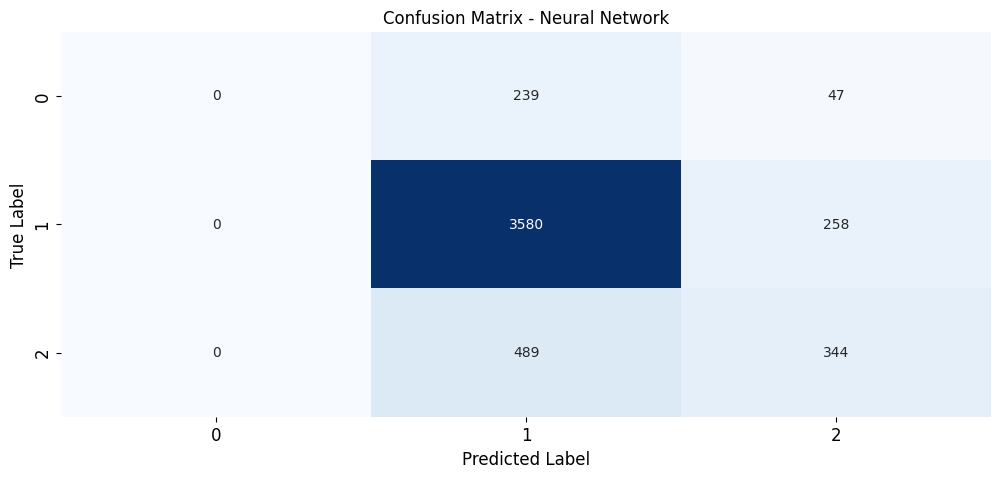

In [ ]:
# Compute confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Neural Network')
plt.show()